# Plan thực hiện
# Mô tả dữ liệu: 
- mỗi d_123 là một document 
# Cấu trúc lưu trữ để dể tính toán cho các bước sau:
# Luồng thực hiện
- Xử lý dữ liệu văn bản từ file cô cho thành dạng: { doc_id, num, wd_count, sentence }

In [3]:
%pip install pd numpy nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import re

class DocReader:
    '''
    Tiền xử lý dữ liệu
    Biến đỗi các từ trong tập dữ liệu DUC sang CSV để tiện xử lý. ở các bước tiếp theo
    '''
    def __init__(self, file_name):
        self.file_name = file_name

    def parse_sentence(self, line):
        match = re.match(r'<s docid="([^"]+)" num="(\d+)" wdcount="(\d+)"> (.*)</s>', line)
        if match:
            return {
                'docid': match.group(1),
                'num': int(match.group(2)),
                'wdcount': int(match.group(3)),
                'sentence': match.group(4)
            }
        return None

    def to_df(self):
        '''
        Duyệt tất các file trong thư mục data - sau đó parse senctence.
        Dữ liệu sẽ được lưu vào DataFrame
        '''
        data = []
        file_path = os.path.join(self.file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    line = line.strip()
                    if line.startswith('<s docid='):
                        parsed = self.parse_sentence(line)
                        if parsed:
                            data.append(parsed)

        return pd.DataFrame(data)

# reader = DocReader('/workspaces/py_env_research/NLP/DUC_TEXT/train/d061j')
# result = reader.to_df()
# result.head()


In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

class TextPreProcessing:
    def __init__(self, sentences):
        self.sentences = sentences
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self):
        cleaned_sentences = []
        for sentence in self.sentences:
            # Remove punctuation
            sentence = re.sub(r'[^\w\s]', '', sentence)
            
            # Lemmatize 
            # remove stopword [TODO]: Co the khgon can remove stopword
            words = sentence.split()
            lemmatized_words = [
                self.lemmatizer.lemmatize(word, pos='v')
                for word in words
                if word.lower() not in self.stop_words
            ]
            cleaned_sentence = ' '.join(lemmatized_words)
            cleaned_sentences.append(cleaned_sentence)
        
        return cleaned_sentences
    

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/vscode/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
clean = TextPreProcessing(
    ['''The motion picture industry's most coveted award, Oscar, was created 60 years ago and 1,816 of the statuettes have been produced so far.'''])
cleaned_sentences = clean.clean_text()
cleaned_sentences

['motion picture industrys covet award Oscar create 60 years ago 1816 statuettes produce far']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityProcess:
  def __init__(self, sentences, method=1):
    self.sentences = sentences
    self.tf_idf_matrix = None
    self.method = method
    if method == 1:
      self.init_tf_idf()
      
  
  def init_tf_idf(self):
    vectorizer = TfidfVectorizer()
    self.tf_idf_matrix = vectorizer.fit_transform(self.sentences)
  
  def sim(self, doc_index_1, doc_index_2):
    vector_doc_1 = self.tf_idf_matrix[doc_index_1]
    vector_doc_2 = self.tf_idf_matrix[doc_index_2]
    # cosine_sim = euclidean_distances(vector_doc_1, vector_doc_2)
    cosine_sim = cosine_similarity(vector_doc_1, vector_doc_2)
    return cosine_sim[0][0]


# sim_proc = SimilarityProcess(sentences)
# common_matrix = sim_proc.commonword_matrix()

# Algorithm: PageRank for Undirected Graph
1. Chuyen matran thanh matran kieu numpy de thuc hien cac buoc tinh toan de dang hon như shape, sum,....
2. Tim bac cua tung node.
4. Luu y:
- Co mot so cong thuc no dung ma tran chuyen vi graph.T may cai do dung cho do thi co huong thoi:
  + Vi sao?
5. Tai sao?
  - numpy.dot? Thay vi loop de kiem tra dieu kien - dinh co lien ket voi dinh khac de tinh pr - khi ham nay se nhan 2 ma tran lai voi nhau - cai nao co chi so (1) thi co value, cai nao khogn co chi so (0) thi khong co value
  - dot([[0, 1, 0],[1, 0, 1],[0, 1, 0]], [[0, 1/2, 0],[1/3, 0, 1/2],[0, 1/2, 0]])
  

In [8]:

'''
  Phần này là tính toan PageRank cho ma trận kề đã tạo ở bước trước.
  - Sử dụng ma trận kề đã tạo để tính toan PageRank.
  - Kết quả là ma trận PageRank cho từng node trong ma trận kề.
  - Test voi vi du cua cô trên lớp.
  NOTE:
   After the graph is constructed (undirected unweighted graph), the score associated with each vertex is set to an initial value of 1, and the ranking
algorithm described in section 2 is run on the graph for several iterations until it converges – usually for 20-30 iterations, at a threshold of 0.0001
'''
class PageRankAlgorithm:
    def __init__(self, undirected_graph, damping_factor=0.85, max_loop=29, delta=1e-4):
      self.undirected_graph = undirected_graph
      self.damping_factor = damping_factor
      self.max_loop = max_loop
      self.delta = delta

    def compute(self):
      import numpy 
      undirected_graph = numpy.array(self.undirected_graph, dtype=float)

      total_node = undirected_graph.shape[0]
      degree_of_node = undirected_graph.sum(axis=1)
      
      base_matrix = numpy.ones(total_node)
      # [[1,1,1,1]]
      degree_of_node[degree_of_node == 0] = 1 #avoid / 0
      
      for _ in range(self.max_loop):
        new_page_rank_matrix = self.damping_factor * numpy.dot(undirected_graph, base_matrix/degree_of_node) + (1 - self.damping_factor) / total_node
        if sum(abs(new_page_rank_matrix - base_matrix)) < self.delta:
          break
        base_matrix = new_page_rank_matrix

      return base_matrix

# data = [
#   [0, 1, 1, 1, 1, 0],
#   [1, 0, 1, 1, 1, 0],
#   [1, 1, 0, 1, 0, 0],
#   [1, 1, 1, 0, 0, 1],
#   [1, 1, 0, 0, 0, 1],
#   [0, 0, 0, 1, 1, 0]
# ]

# pg = PageRankAlgorithm(data)
# home = pg.compute()
# home

In [9]:
'''
    Sau khi tính xong rồi thì chuyển qua bước tóm nội dung:
'''

class Summarizer:
    def __init__(self, doc_df, page_rank_scores, n_top=0.15):
        self.doc_df = doc_df
        self.page_rank_scores = page_rank_scores
        self.n_top = n_top
    

    def map_pr_score(self):
        # Map PageRank scores to DataFrame
        df_clone = self.doc_df.copy()
        df_clone['pr_score'] = self.page_rank_scores
        return df_clone
    def summarize(self):
        '''
            b2: Map index to page rank score
            b3: Select top n_top sentences with highest page rank
            b4: Return a DataFrame of the selected sentences, ordered by their original order in the document
        '''
        df_pr = self.map_pr_score()

        n_top = int(len(df_pr) * self.n_top)
        top_df = df_pr.sort_values('pr_score', ascending=False).head(n_top)

        top_df = top_df.sort_values(['docid', 'num'])
        return top_df.reset_index(drop=True)


In [10]:
class PageRankEvaluate:
  def __init__(self, summary_df, ref_df):
    self.summary_df = summary_df
    self.ref_df = ref_df

  def evaluate(self):
    # Convert to sets of (docid, num)
    pred_set = set(zip(self.summary_df['docid'], self.summary_df['num']))
    ref_set = set(zip(self.ref_df['docid'], self.ref_df['num']))

    correct = len(pred_set & ref_set)
    total_pred = len(pred_set)
    total_ref = len(ref_set)

    precision = correct / total_pred if total_pred > 0 else 0
    recall = correct / total_ref if total_ref > 0 else 0
    
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Main process

In [11]:
# # Main process:
# # Import lib
# import numpy as np
# # Read
# # Process text
# DOC_FILE_NAME = 'd105g'  
# reader = DocReader(f'/workspaces/py_env_research/NLP/DUC_TEXT/train/{DOC_FILE_NAME}')
# reader_sum = DocReader(f'/workspaces/py_env_research/NLP/DUC_SUM/{DOC_FILE_NAME}')
# df = reader.to_df()
# df_sum = reader_sum.to_df()

# df['cleaned_sentence'] = TextPreProcessing(df['sentence']).clean_text()

# # Caculate similarity
# sim = SimilarityProcess(df['cleaned_sentence'])

# similarity_matrix = np.zeros((len(df), len(df)))
# SIMILARITY_THRESHOLD = 0.1
# for i in range(len(df)):
#     for j in range(i + 1, len(df)):
#         sim_value = sim.sim(i, j)
#         if sim_value > SIMILARITY_THRESHOLD:
#             similarity_matrix[i, j] = sim_value
# # Compute the similarity matrix in one call
# similarity_matrix


# pr = PageRankAlgorithm(similarity_matrix)
# pr_score = pr.compute()
# pr_score


# # Sumarize
# summarizer = Summarizer(df, pr_score, n_top=0.28)
# predict = summarizer.summarize()
# predict



# eval = PageRankEvaluate(
#   summary_df=df_sum,
#   ref_df=predict 
# )
# precision, recall, f1 = eval.evaluate()
# print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

In [12]:
import os
import numpy as np
import multiprocessing

class DUCPageRankSummarizer:
    def __init__(self, train_dir, sum_dir, similarity_threshold=0.1, n_top=0.28):
        self.train_dir = train_dir
        self.sum_dir = sum_dir
        self.similarity_threshold = similarity_threshold
        self.n_top = n_top

    def get_file_names(self):
        # Get all file names in the summary directory
        return [f for f in os.listdir(self.sum_dir) if os.path.isfile(os.path.join(self.sum_dir, f))]

    def process_file(self, file_name):
        # Read documents
        reader = DocReader(os.path.join(self.train_dir, file_name))
        reader_sum = DocReader(os.path.join(self.sum_dir, file_name))
        df = reader.to_df()
        df_sum = reader_sum.to_df()
        
        df['cleaned_sentence'] = TextPreProcessing(df['sentence']).clean_text()
        sentences = df['cleaned_sentence']
        
        sim = SimilarityProcess(sentences, 1)
        similarity_matrix = np.zeros((len(df), len(df)))
        for i in range(len(df)):
            for j in range(i + 1, len(df)):
                sim_value = sim.sim(i, j)
                if sim_value > self.similarity_threshold:
                    similarity_matrix[i, j] = 1
                    similarity_matrix[j, i] = 1
                    # similarity_matrix[j, i] = sim_value
                    # similarity_matrix[j, i] = sim_value
                    

        # PageRank
        pr = PageRankAlgorithm(similarity_matrix)
        pr_score = pr.compute()

        # Summarize
        summarizer = Summarizer(df, pr_score, n_top=self.n_top)
        predict = summarizer.summarize()

        # Evaluate
        eval = PageRankEvaluate(summary_df=df_sum, ref_df=predict)
        precision, recall, f1 = eval.evaluate()
        return {
            'file': file_name,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'predict': predict
        }

    def process_all(self):
        import concurrent.futures

        results = []
        file_names = self.get_file_names()
        num_cores = max(6, multiprocessing.cpu_count())  # Use up to 12 cores or the available CPU count
        print(f"Processing {len(file_names)} files with {num_cores} threads...")

        with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
            future_to_file = {executor.submit(self.process_file, file_name): file_name for file_name in file_names}
            for future in concurrent.futures.as_completed(future_to_file):
                file_name = future_to_file[future]
                try:
                    result = future.result()
                    results.append(result)
                    print(f"Processed {file_name}: Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1: {result['f1']:.4f}")
                except Exception as exc:
                    print(f"{file_name} generated an exception: {exc}")
        return results

In [13]:
summarizer = DUCPageRankSummarizer(
    train_dir='./DUC_TEXT/train',
    sum_dir='./DUC_SUM',
    similarity_threshold=0.12,
    n_top=0.2
)
all_results = summarizer.process_all()

Processing 59 files with 12 threads...
d062j generated an exception: 'docid'
d068f generated an exception: 'docid'
Processed d061j: Precision: 0.4444, Recall: 0.2162, F1: 0.2909
Processed d064j: Precision: 0.4211, Recall: 0.2051, F1: 0.2759
Processed d113h: Precision: 0.3571, Recall: 0.1613, F1: 0.2222
Processed d119i: Precision: 0.4000, Recall: 0.0889, F1: 0.1455
Processed d073b: Precision: 0.3636, Recall: 0.0800, F1: 0.1311
Processed d082a: Precision: 0.5833, Recall: 0.1707, F1: 0.2642
d090d generated an exception: 'docid'
Processed d092c: Precision: 0.2105, Recall: 0.0690, F1: 0.1039
Processed d066j: Precision: 0.3158, Recall: 0.1500, F1: 0.2034
Processed d105g: Precision: 0.6364, Recall: 0.1321, F1: 0.2188
Processed d076b: Precision: 0.2308, Recall: 0.0455, F1: 0.0759
d084a generated an exception: 'docid'
Processed d063j: Precision: 0.2778, Recall: 0.1000, F1: 0.1471
d072f generated an exception: 'docid'
d108g generated an exception: 'docid'
d086d generated an exception: 'docid'
Pr

In [14]:
summarizer = DUCPageRankSummarizer(
    train_dir='./DUC_TEXT/test',
    sum_dir='./DUC_SUM',
    similarity_threshold=0.1,
    n_top=0.28
)
test_data_set_results = summarizer.process_all()

Processing 59 files with 12 threads...
d086d generated an exception: 'sentence'
d068f generated an exception: 'sentence'
d076b generated an exception: 'sentence'
d064j generated an exception: 'sentence'
d072f generated an exception: 'sentence'
d073b generated an exception: 'sentence'
d090d generated an exception: 'sentence'
d084a generated an exception: 'sentence'
d082a generated an exception: 'sentence'
d099e generated an exception: 'sentence'
d104g generated an exception: 'sentence'
d092c generated an exception: 'sentence'
d062j generated an exception: 'sentence'
d102e generated an exception: 'sentence'
d100e generated an exception: 'sentence'
d066j generated an exception: 'sentence'
d105g generated an exception: 'sentence'
d074b generated an exception: 'sentence'
d061j generated an exception: 'sentence'
d063j generated an exception: 'sentence'
d081a generated an exception: 'sentence'
d065j generated an exception: 'sentence'
d108g generated an exception: 'sentence'
d111h generated an

# Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
1. P: So ket qua dung / so mo hinh trich xuat ra
2. R: So ket qua dung / cai chung ta ky vong.
3. F1: 2*(P*R)/(P+R)

In [15]:
import matplotlib.pyplot as plt

def plot_line_chart(results):
    files = [r['file'] for r in results]
    precision = [r['precision'] for r in results]
    recall = [r['recall'] for r in results]
    f1 = [r['f1'] for r in results]

    plt.figure(figsize=(15, 5))
    plt.plot(files, precision, marker='o', label='Precision')
    plt.plot(files, recall, marker='s', label='Recall')
    plt.plot(files, f1, marker='^', label='F1')

    plt.xlabel('Files')
    plt.ylabel('Score')
    plt.title('Trend of Evaluation Metrics Across Files')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def filter_f1_above(results, threshold=0.18):
    return [r for r in results if r['f1'] > threshold]


In [16]:
def plot_bar_chart(results):
    files = [r['file'] for r in results]
    precision = [r['precision'] for r in results]
    recall = [r['recall'] for r in results]
    f1 = [r['f1'] for r in results]

    x = range(len(files))
    width = 0.25

    plt.figure(figsize=(15, 5))
    plt.bar([i - width for i in x], precision, width=width, label='Precision')
    plt.bar(x, recall, width=width, label='Recall')
    plt.bar([i + width for i in x], f1, width=width, label='F1')

    # Calculate and plot median lines
    median_precision = np.median(precision)
    median_recall = np.median(recall)
    median_f1 = np.median(f1)
    plt.axhline(median_precision, color='blue', linestyle='--', linewidth=1, label=f'Median Precision: {median_precision:.2f}')
    plt.axhline(median_recall, color='orange', linestyle='--', linewidth=1, label=f'Median Recall: {median_recall:.2f}')
    plt.axhline(median_f1, color='green', linestyle='--', linewidth=1, label=f'Median F1: {median_f1:.2f}')

    plt.xlabel('Files')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics Across Files (Bar Chart)')
    plt.xticks(x, files, rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()


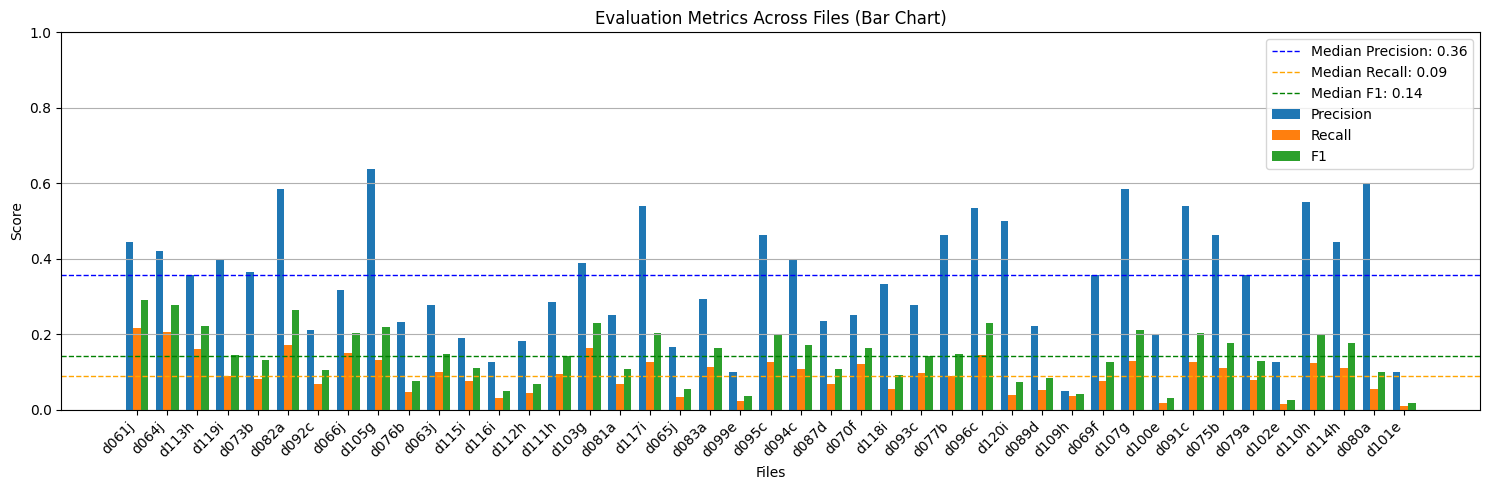

In [17]:
filter_f1_above(all_results, 0.28)
plot_bar_chart(all_results)

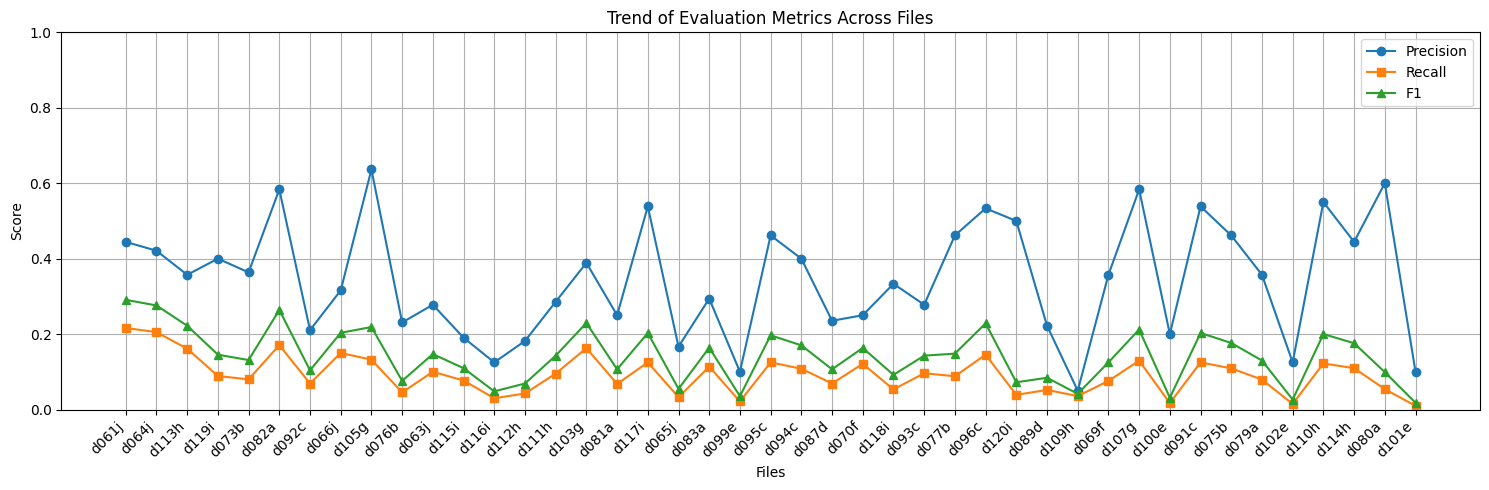

In [18]:
plot_line_chart(all_results)

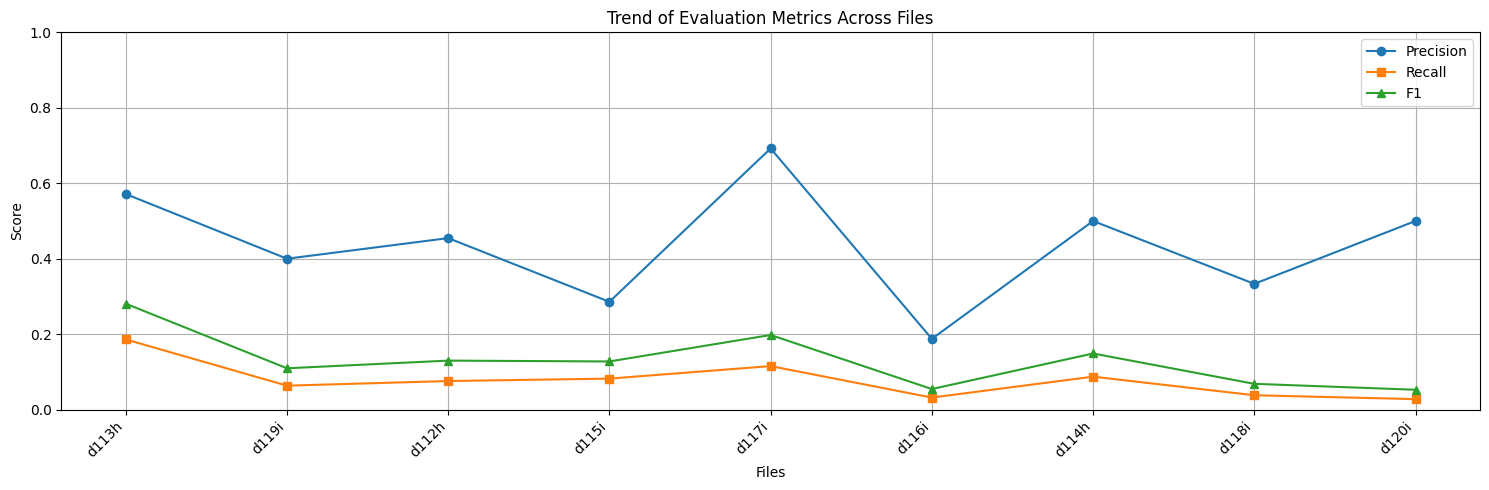

In [19]:
plot_line_chart(test_data_set_results)